In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
pd.options.mode.chained_assignment = None 

In [2]:
#Data Source: 
#https://data.cms.gov/Medicare-Home-Health-Agency-HHA-/Medicare-Home-Health-Agency-HHA-Provider-Aggregate/fdg8-v2i5

medicare_data = pd.read_csv('data/medicare_data.csv')

In [3]:
medicare_data.head()

,Provider ID,Agency Name,Street Address,City,State,Zip Code,Total Episodes (non-LUPA),Distinct Beneficiaries (non-LUPA),Average Number of Total Visits Per Episode (non-LUPA),Average Number of Skilled Nursing Visits Per Episode (non-LUPA),...,Percent of Beneficiaries with COPD,Percent of Beneficiaries with Depression,Percent of Beneficiaries with Diabetes,Percent of Beneficiaries with Hyperlipidemia,Percent of Beneficiaries with Hypertension,Percent of Beneficiaries with IHD,Percent of Beneficiaries with Osteoporosis,Percent of Beneficiaries with RA/OA,Percent of Beneficiaries with Schizophrenia,Percent of Beneficiaries with Stroke
0,17008,JEFFERSON COUNTY HOME CARE,2201 ARLINGTON AVENUE,BESSEMER,AL,35020,133,54,11.6,7.4,...,0.16667,0.18519,0.57407,0.44444,NaN,0.29630,0.00000,0.48148,0.27778,0.07407
1,17009,ALACARE HOME HEALTH & HOSPICE,2970 LORNA ROAD,BIRMINGHAM,AL,35216,12879,6616,18.9,9.2,...,0.38316,0.39389,0.45118,0.67427,NaN,0.56439,0.13286,0.64631,0.05230,0.12757
2,17013,GENTIVA HEALTH SERVICES,1239 RUCKER BLVD,ENTERPRISE,AL,36330,1236,612,23.4,8.5,...,0.32516,0.38235,0.45261,0.66176,NaN,0.51144,0.16503,0.67157,0.05229,0.12745
3,17014,AMEDISYS HOME HEALTH,68278 MAIN STREET,BLOUNTSVILLE,AL,35031,685,403,21.4,8.2,...,0.36476,0.46898,0.44417,0.60794,NaN,0.54591,0.12903,0.67246,0.08685,0.17370
4,17016,SOUTHEAST ALABAMA HOMECARE,804 GLOVER AVENUE,ENTERPRISE,AL,36330,685,362,15.5,8.5,...,0.40331,0.35912,0.52486,0.69337,NaN,0.58287,0.14917,0.60773,0.05249,0.15193


In [4]:
#Basic Information
print('Number of rows: {} | Number of Columns: {}'.format(medicare_data.shape[0], medicare_data.shape[1]))


Number of rows: 10139 | Number of Columns: 49


In [5]:
for col in medicare_data.columns:
    print(col)

Provider ID
Agency Name
Street Address
City
State
Zip Code
Total Episodes (non-LUPA)
Distinct Beneficiaries (non-LUPA)
Average Number of Total Visits Per Episode (non-LUPA)
Average Number of Skilled Nursing Visits Per Episode (non-LUPA)
Average Number of PT Visits Per Episode (non-LUPA)
Average Number of OT Visits Per Episode (non-LUPA)
Average Number of  ST Visits Per Episode (non-LUPA)
Average Number of Home Health Aide Visits Per Episode (non-LUPA)
Average Number of Medical-Social Visits Per Episode (non-LUPA)
Total HHA Charge Amount (non-LUPA)
Total HHA Medicare Payment Amount (non-LUPA)
Total HHA Medicare Standard Payment Amount (non-LUPA)
Outlier Payments as a Percent of Medicare Payment Amount (non-LUPA)
Total LUPA Episodes
Total HHA Medicare Payment Amount for LUPAs
Average Age
Male Beneficiaries
Female Beneficiaries
Nondual Beneficiaries
Dual Beneficiaries
White Beneficiaries
Black Beneficiaries
Asian Pacific Islander Beneficiaries
Hispanic Beneficiaries
American Indian or Ala

In [6]:
#rename columns:

medicare_data.rename(columns={
    'Provider ID':'provider_id',
    'Agency Name':'agency',
    'Street Address':'address',
    'City':'city',
    'State':'state',
    'Zip Code':'zip_code',
    'Total Episodes (non-LUPA)':'total_episodes',
    'Distinct Beneficiaries (non-LUPA)':'distinct_beneficiaries',
    'Average Number of Total Visits Per Episode (non-LUPA)':'total_visits_episode',
    'Average Number of Skilled Nursing Visits Per Episode (non-LUPA)':'sn_episode',
    'Average Number of PT Visits Per Episode (non-LUPA)':'pt_episode',
    'Average Number of OT Visits Per Episode (non-LUPA)':'ot_episode',
    'Average Number of  ST Visits Per Episode (non-LUPA)':'st_episode',
    'Average Number of Home Health Aide Visits Per Episode (non-LUPA)':'hha_episode',
    'Average Number of Medical-Social Visits Per Episode (non-LUPA)':'msw_episode',
    'Total HHA Charge Amount (non-LUPA)':'total_charge',
    'Total HHA Medicare Payment Amount (non-LUPA)':'medicare_payment',
    'Total HHA Medicare Standard Payment Amount (non-LUPA)':'expected_payment',
    'Outlier Payments as a Percent of Medicare Payment Amount (non-LUPA)':'outlier_payment',
    'Total LUPA Episodes':'lupa_episodes',
    'Total HHA Medicare Payment Amount for LUPAs':'lupa_payment',
    'Average Age':'age',
    'Male Beneficiaries':'num_male',
    'Female Beneficiaries':'num_female',
    'Nondual Beneficiaries':'non_dual',
    'Dual Beneficiaries':'dual',
    'Black Beneficiaries':'black',
    'White Beneficiaries':'white',
    'Asian Pacific Islander Beneficiaries':'asian',
    'Hispanic Beneficiaries':'hispanic',
    'American Indian or Alaska Native Beneficiaries':'alaskan',
    'Other/ Unknown Beneficiaries':'unknown_race',
    'Average HCC Score':'hcc_score',
    'Other/ Unknown Beneficiaries':'unknown_race',
    'Percent of Beneficiaries with Atrial Fibrillation':'atrial_fib',
    "Percent of Beneficiaries with Alzheimer's":'alzheimer',
    'Percent of Beneficiaries with Asthma':'asthma',
    'Percent of Beneficiaries with Cancer':'cancer',
    'Percent of Beneficiaries with CHF':'chf',
    'Percent of Beneficiaries with Chronic Kidney Disease':'kidney_disease',
    'Percent of Beneficiaries with COPD':'copd',
    'Percent of Beneficiaries with Depression':'depression',
    'Percent of Beneficiaries with Diabetes':'diabetes',
    'Percent of Beneficiaries with Hyperlipidemia':'hyperlipidemia',
    'Percent of Beneficiaries with Hypertension':'hypertension',
    'Percent of Beneficiaries with IHD':'ihd',
    'Percent of Beneficiaries with Osteoporosis':'osteoporosis',
    'Percent of Beneficiaries with RA/OA':'ra_oa',
    'Percent of Beneficiaries with Schizophrenia':'schizophrenia',
    'Percent of Beneficiaries with Stroke':'stroke',

    },                     
                     
                 inplace=True)

In [7]:
medicare_data.columns

Index(['provider_id', 'agency', 'address', 'city', 'state', 'zip_code',
       'total_episodes', 'distinct_beneficiaries', 'total_visits_episode',
       'sn_episode', 'pt_episode', 'ot_episode', 'st_episode', 'hha_episode',
       'msw_episode', 'total_charge', 'medicare_payment', 'expected_payment',
       'outlier_payment', 'lupa_episodes', 'lupa_payment', 'age', 'num_male',
       'num_female', 'non_dual', 'dual', 'white', 'black', 'asian', 'hispanic',
       'alaskan', 'unknown_race', 'hcc_score', 'atrial_fib', 'alzheimer',
       'asthma', 'cancer', 'chf', 'kidney_disease', 'copd', 'depression',
       'diabetes', 'hyperlipidemia', 'hypertension', 'ihd', 'osteoporosis',
       'ra_oa', 'schizophrenia', 'stroke'],
      dtype='object')

In [8]:
from sklearn.model_selection import train_test_split
medicare_data_train, medicare_data_test, = train_test_split( medicare_data, test_size=0.20, random_state=42)

In [9]:
medicare_data_train.shape

(8111, 49)

In [10]:
medicare_data_test.shape

(2028, 49)

In [40]:
#Plot missing data
def plot_missing_data(fname, dataFrame):
    miss_data = {col: (pd.isnull(dataFrame[col]).sum()/dataFrame.shape[0])*100 for col in list(dataFrame) if
                (pd.isnull(dataFrame[col]).sum()/dataFrame.shape[0])*100 > 0}
    miss_data_df = pd.DataFrame.from_dict(data=miss_data, orient='index', columns=['percent_missing'])
    miss_data_df = miss_data_df.rename_axis('column_name').reset_index()
    
    if miss_data_df.empty:
        print('No Null Values Found')
    else:
        plt.figure(figsize=(15, 5))    
        miss_data_df.groupby(['column_name'])['percent_missing'].agg('sum').sort_values(ascending=False).plot(kind = 'bar')
        plt.title('Percentage of Missing Values By Columns {}'.format(fname))
        plt.ylabel('Percentage')
        plt.xlabel('Column Name')
        plt.show()


In [41]:
plot_missing_data(fname = 'Train', dataFrame = medicare_data_train)

No Null Values Found


In [42]:
plot_missing_data(fname = 'Test', dataFrame = medicare_data_test)

No Null Values Found


### Impute Nan With Mean

In [43]:
def impute_mean(dataFrame):
    nullCols = dataFrame.columns[dataFrame.isnull().any()].tolist()
    for col in nullCols:  
        col_mean = dataFrame[col].mean()
        dataFrame[col] = dataFrame[col].fillna(col_mean)
    return dataFrame

In [44]:
#Impute the train with the mean of the train
medicare_data_train = impute_mean(medicare_data_train)
#Check to see if there are any null values after imputation
plot_missing_data(fname = 'train', dataFrame = medicare_data_train)

No Null Values Found


In [45]:
#Impute the test with the mean of the test
medicare_data_test = impute_mean(medicare_data_test)
#Check to see if there are any null values after imputation
plot_missing_data(fname = 'test', dataFrame = medicare_data_test)

No Null Values Found


In [46]:
#Save the train and Test values to disk
medicare_data_train.to_csv('data/medicare_data_train.csv', index=False);
medicare_data_test.to_csv('data/medicare_data_test.csv',index=False);

### Number of Agencies By State

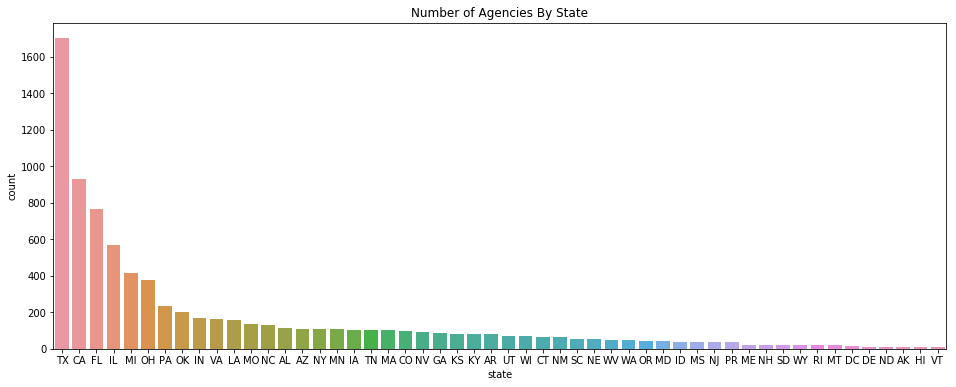

In [47]:
#number of HHA by state
plt.figure(figsize=(16, 6))
plt.title("Number of Agencies By State")
sns.countplot(x='state', data = medicare_data_train, order=medicare_data_train['state'].value_counts().index, );

### Top 15 Cities with the most agencies

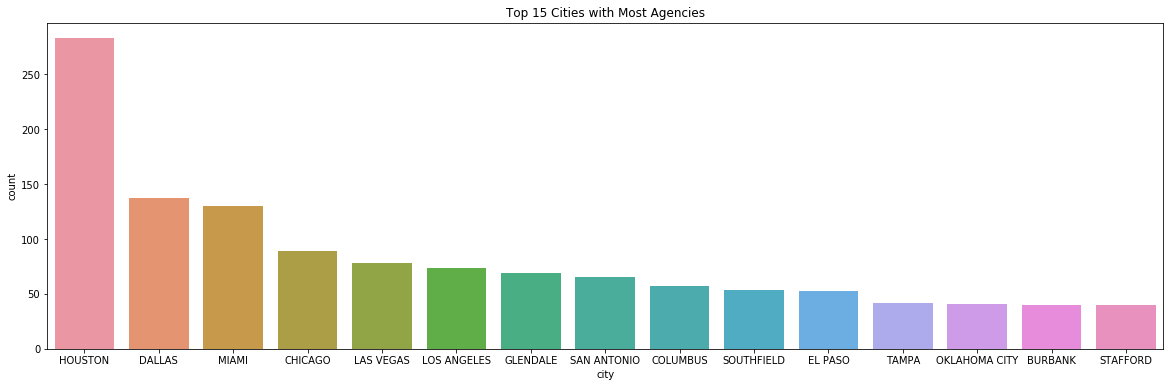

In [48]:
#Top 15 Cities with Agencies
plt.figure(figsize=(20, 6))
plt.title("Top 15 Cities with Most Agencies")
sns.countplot(x='city', data = medicare_data_train, order=medicare_data_train['city'].value_counts().iloc[:15].index);

### Total Number of Episodes by state

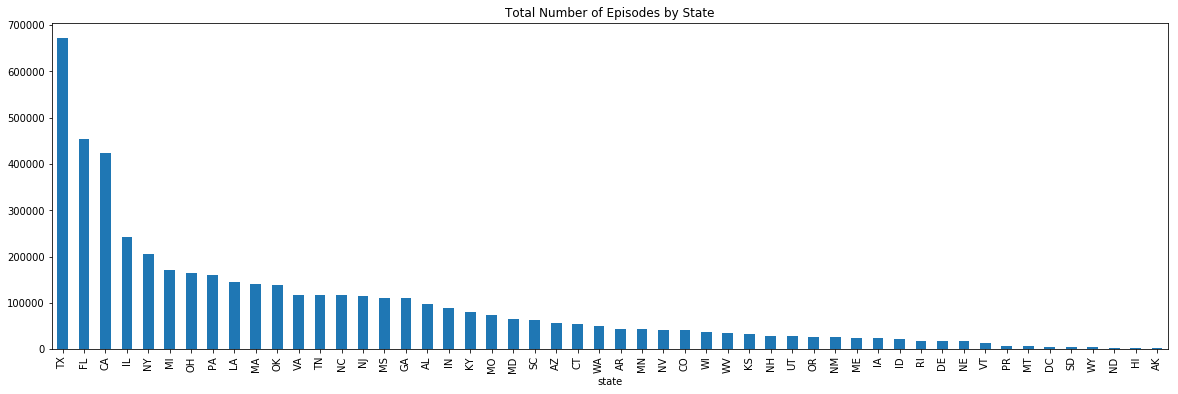

In [49]:
plt.figure(figsize=(20, 6))
plt.title("Total Number of Episodes by State")
medicare_data_train.groupby(['state'])['total_episodes'] \
        .agg('sum').sort_values(ascending=False).plot(kind = 'bar');

### Total Number of Episodes by state

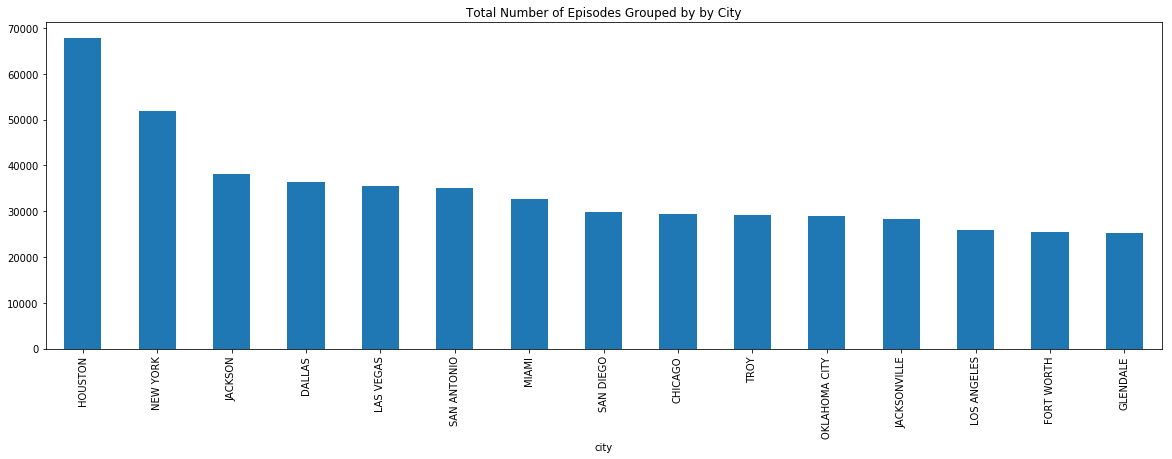

In [50]:
plt.figure(figsize=(20, 6))
plt.title("Total Number of Episodes Grouped by by City")
medicare_data_train.groupby(['city'])['total_episodes'] \
                .agg('sum').sort_values(ascending=False).iloc[:15].plot(kind = 'bar');

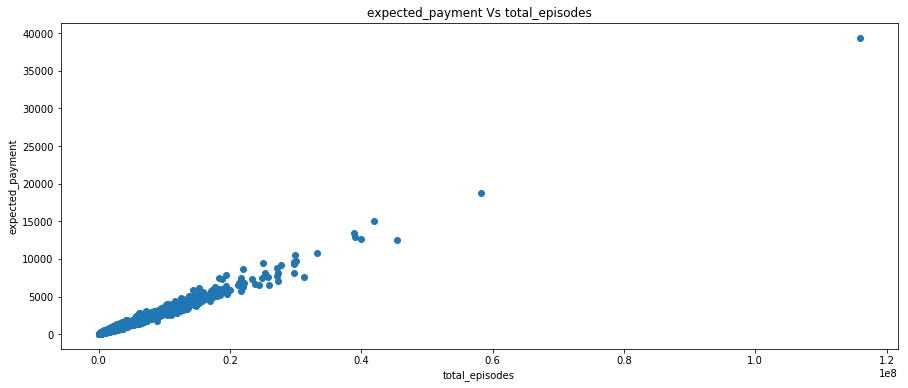

In [51]:
plt.figure(figsize=(15, 6))
plt.scatter( medicare_data_train['expected_payment'], 
            medicare_data_train['total_episodes'])
plt.title('expected_payment Vs total_episodes')
plt.ylabel('expected_payment')
plt.xlabel('total_episodes')
plt.show()

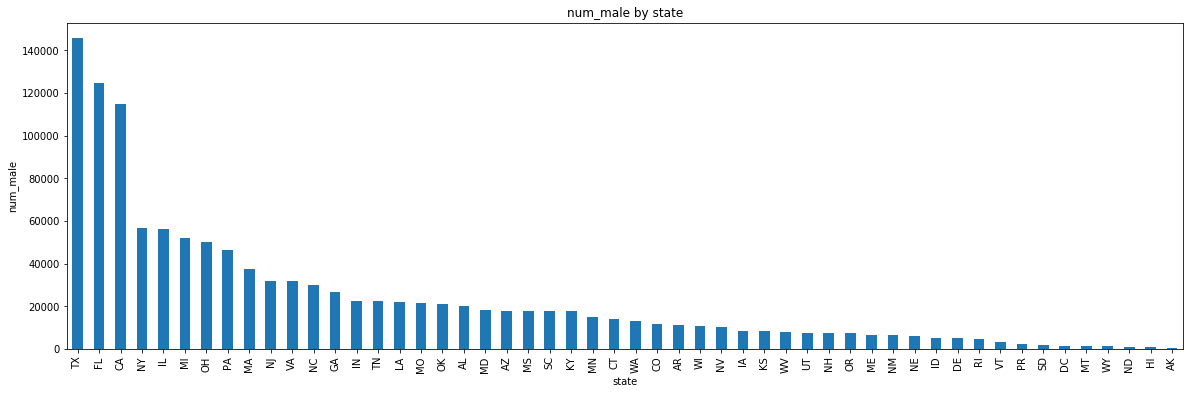

In [56]:
plt.figure(figsize=(20, 6))
medicare_data_train.groupby(['state'])['num_male'].agg('sum').sort_values(ascending=False).plot(kind = 'bar')

plt.ylabel('num_male')
plt.title('num_male by state');

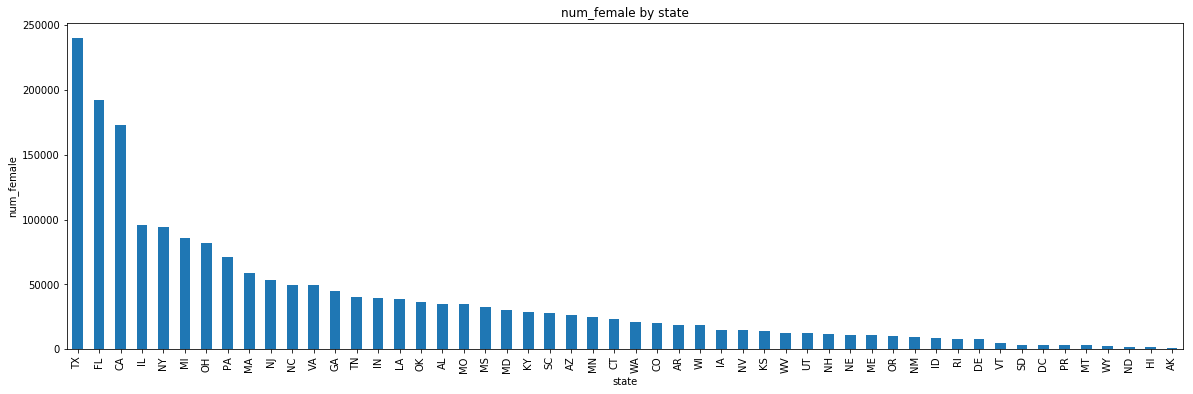

In [57]:
plt.figure(figsize=(20, 6))
medicare_data_train.groupby(['state'])['num_female'].agg('sum').sort_values(ascending=False).plot(kind = 'bar')
plt.ylabel('num_female')
plt.title('num_female by state');

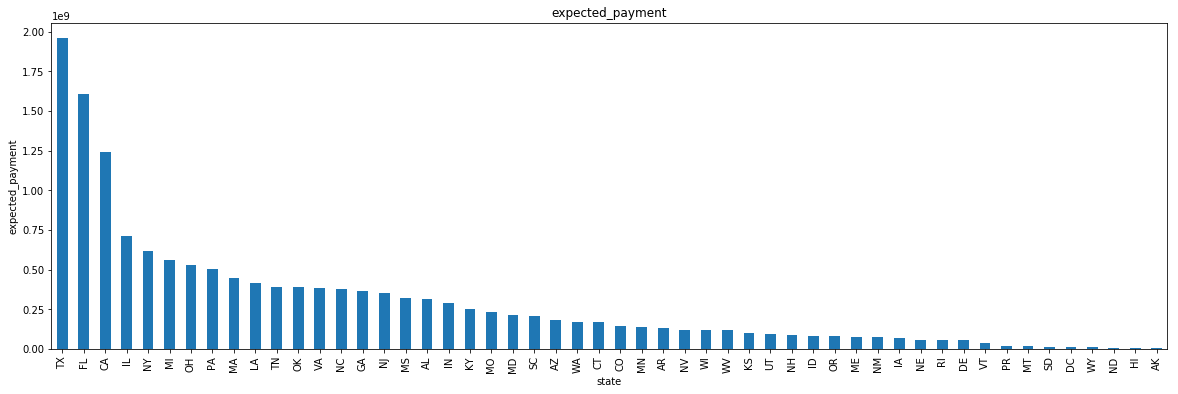

In [25]:
plt.figure(figsize=(20, 6))
medicare_data_train.groupby(['state'])['expected_payment'].agg('sum').sort_values(ascending=False).plot(kind = 'bar')
plt.ylabel('expected_payment')
plt.title('expected_payment');

In [26]:
import geopandas as gpd
from shapely.geometry import Point, Polygon

ModuleNotFoundError: No module named 'geopandas'

In [ ]:
usa = gpd.read_file('data/states_21basic/states.shp')

In [ ]:
usa.head()

In [ ]:
medicare_data_train_merged = usa.set_index('STATE_ABBR').join(medicare_data_train.set_index('state'))

In [ ]:
def plot_maps(dataFrame,mapDframe, quantile, columns):
    nrows = len(columns)
    fig, axArray = plt.subplots( nrows= nrows, ncols= 1, figsize=(30, 30))    
    for col, ax in zip(columns,axArray):
        quantile_value = dataFrame[[col]].quantile(quantile).values[0]
        base = mapDframe.plot(color='white', edgecolor='green', ax = ax)
        dataFrame[dataFrame[col] > quantile_value].plot(ax=base, column=col, legend = True)
        ax.set_title(col + ' Greater ' + str(quantile*100) +' percentile value of ' + str(quantile_value))
        ax.set_axis_off()
    

In [ ]:
columns = ['medicare_payment', 'total_episodes', 'total_visits_episode', 'total_charge', 'alzheimer','asthma']

In [ ]:
plot_maps(dataFrame = medicare_data_train_merged,mapDframe = usa, quantile = 0.95, columns = columns)

In [ ]:
corr = medicare_data_train.corr()

In [27]:
def filterCorrelation(corr, corr_thres = 0.5):
    corr_filtered = corr.where(~np.tril(np.ones(corr.shape)).astype(np.bool))
    corr_filtered = corr_filtered.stack()
    corr_filtered.name = 'Corr Coefficient'
    corr_filtered.index.names = ['feat1', 'feat2']
    corr_filtered = corr_filtered[corr_filtered > corr_thres].to_frame()
    corr_filtered = corr_filtered.stack().reset_index()
    corr_filtered = corr_filtered.drop('level_2', axis=1)
    corr_filtered.columns = ['feat_1', 'feat_2', 'corr']
    corr_filtered = corr_filtered.sort_values(by=['corr', 'feat_1', 'feat_2'], ascending=False)
    return corr_filtered

In [28]:
#View Correlated of  Columns over 0.6
filtered_corr = filterCorrelation(corr, corr_thres = 0.6)
filtered_corr.head()

NameError: name 'corr' is not defined

In [29]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap);

NameError: name 'corr' is not defined

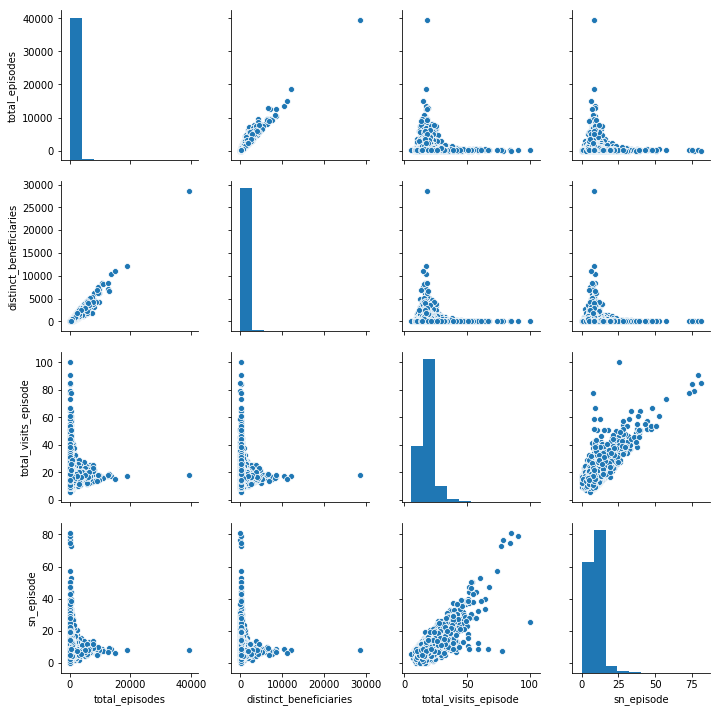

In [30]:
sns.pairplot(medicare_data_train.iloc[:, 6: 10]);

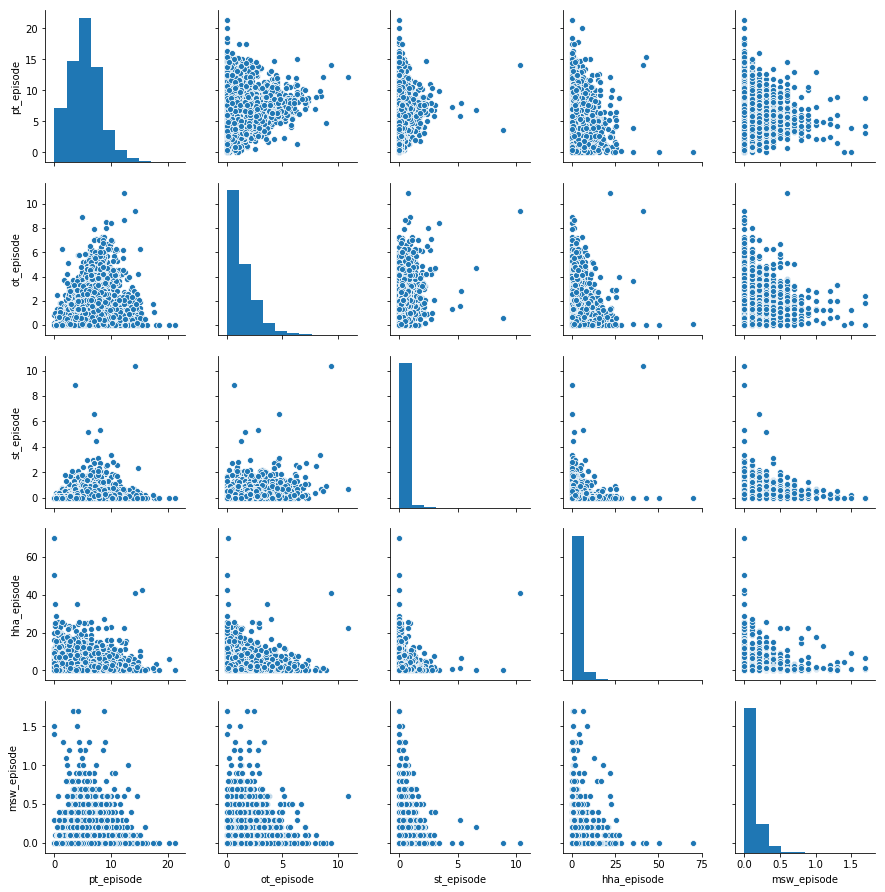

In [31]:
sns.pairplot(medicare_data_train.iloc[:, 10: 15]);

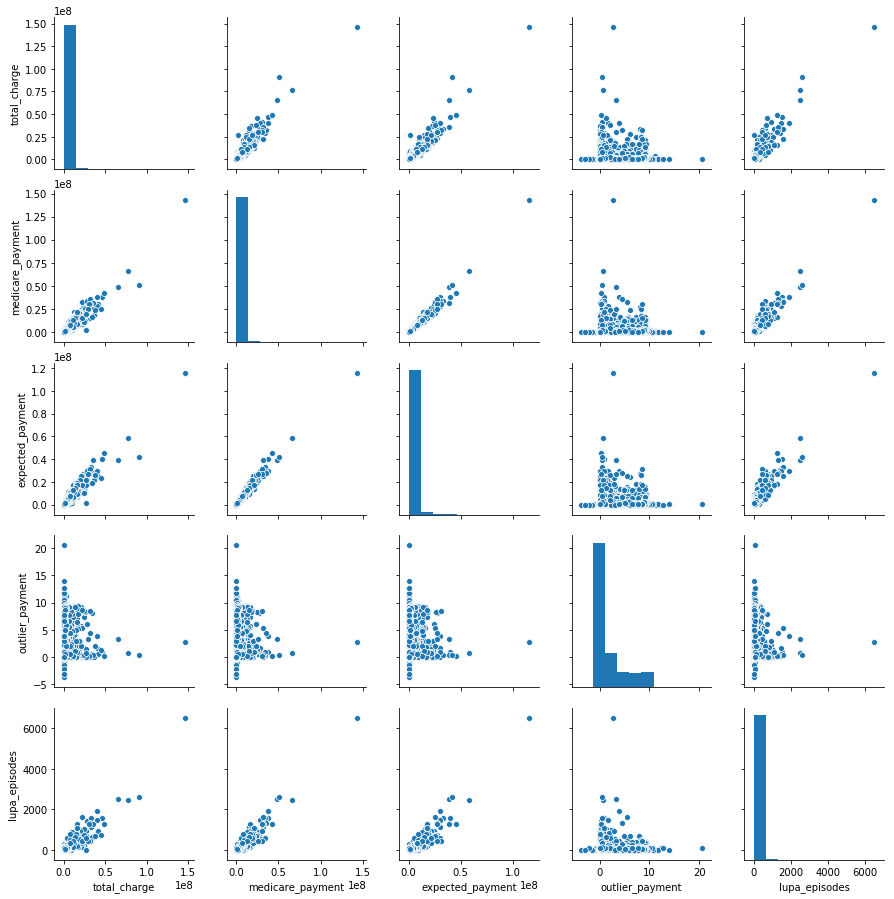

In [32]:
sns.pairplot(medicare_data_train.iloc[:, 15: 20]);

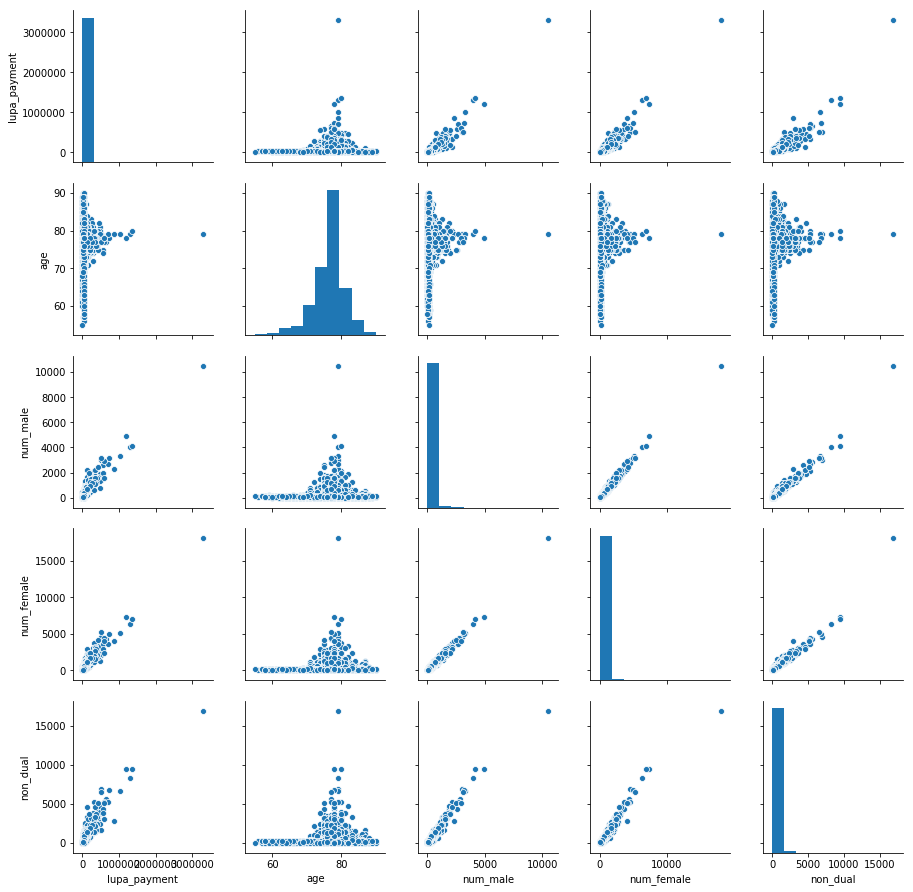

In [33]:
sns.pairplot(medicare_data_train.iloc[:, 20: 25]);

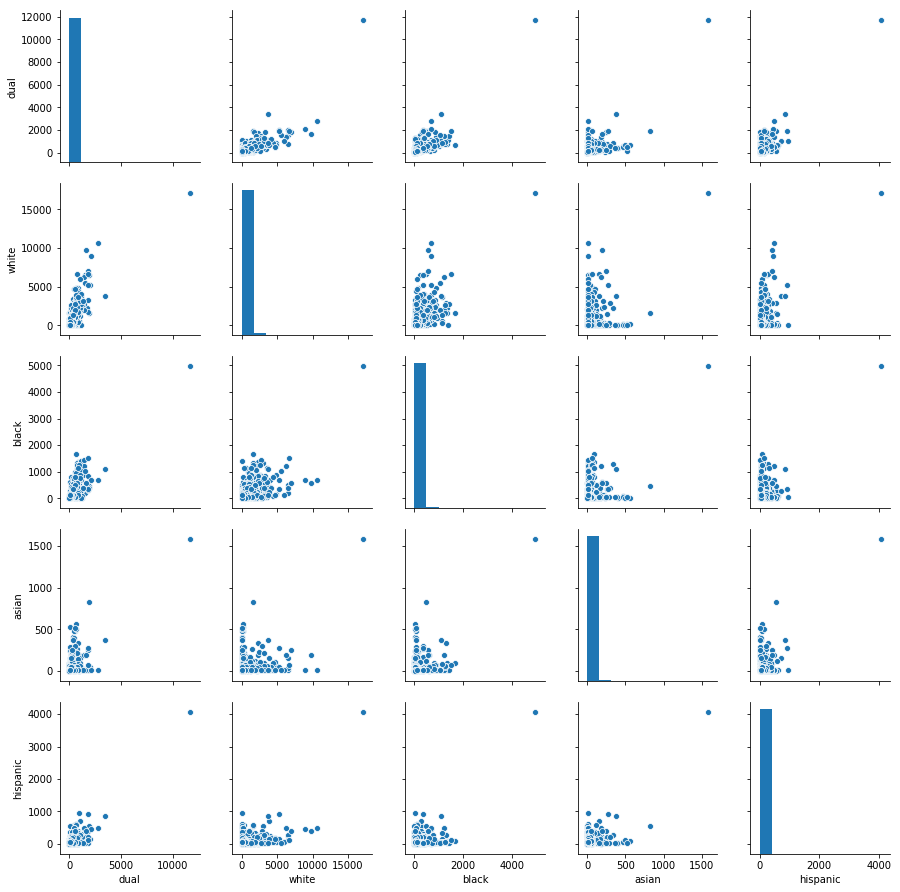

In [34]:
sns.pairplot(medicare_data_train.iloc[:, 25: 30]);

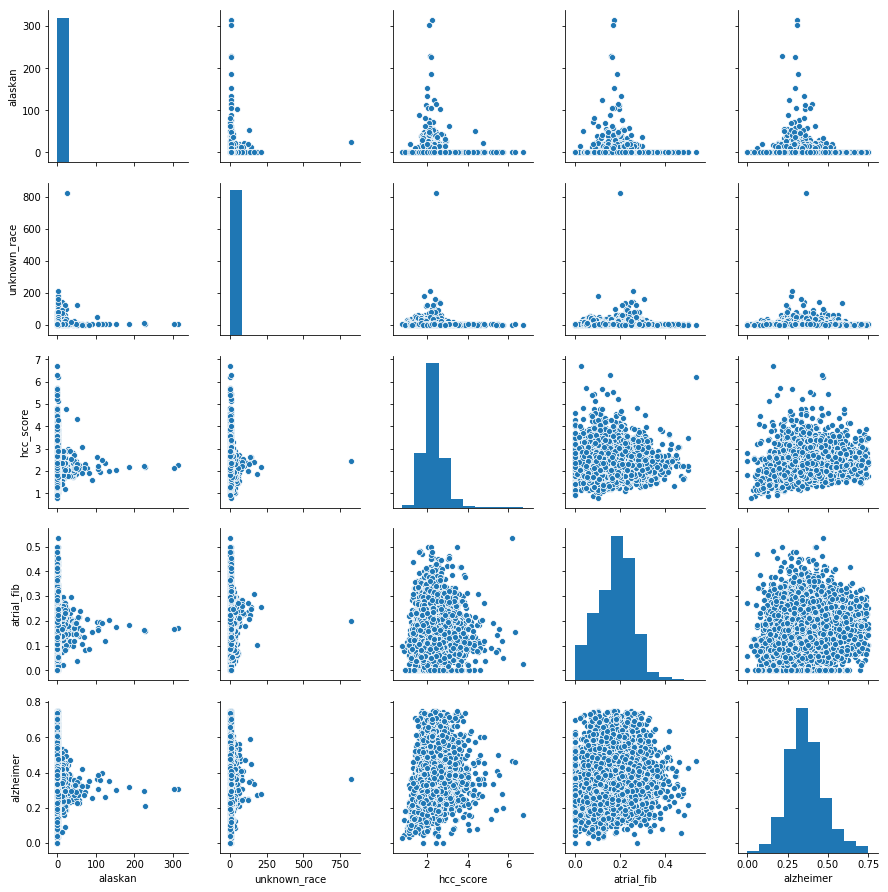

In [35]:
sns.pairplot(medicare_data_train.iloc[:, 30: 35]);

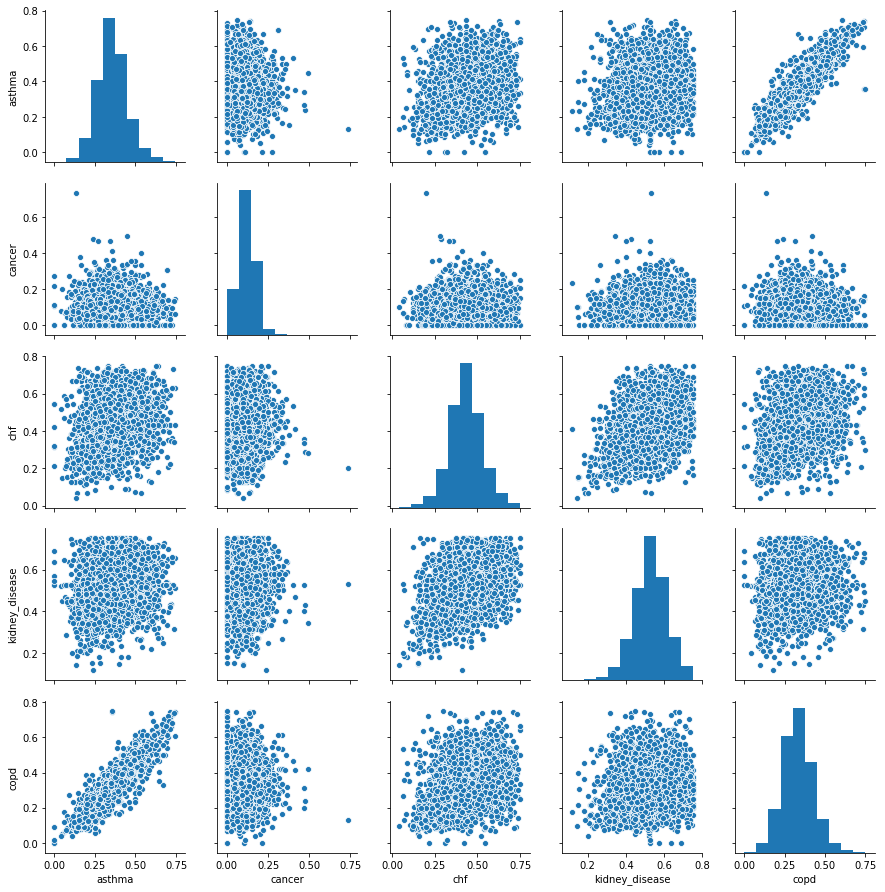

In [36]:
sns.pairplot(medicare_data_train.iloc[:, 35: 40]);

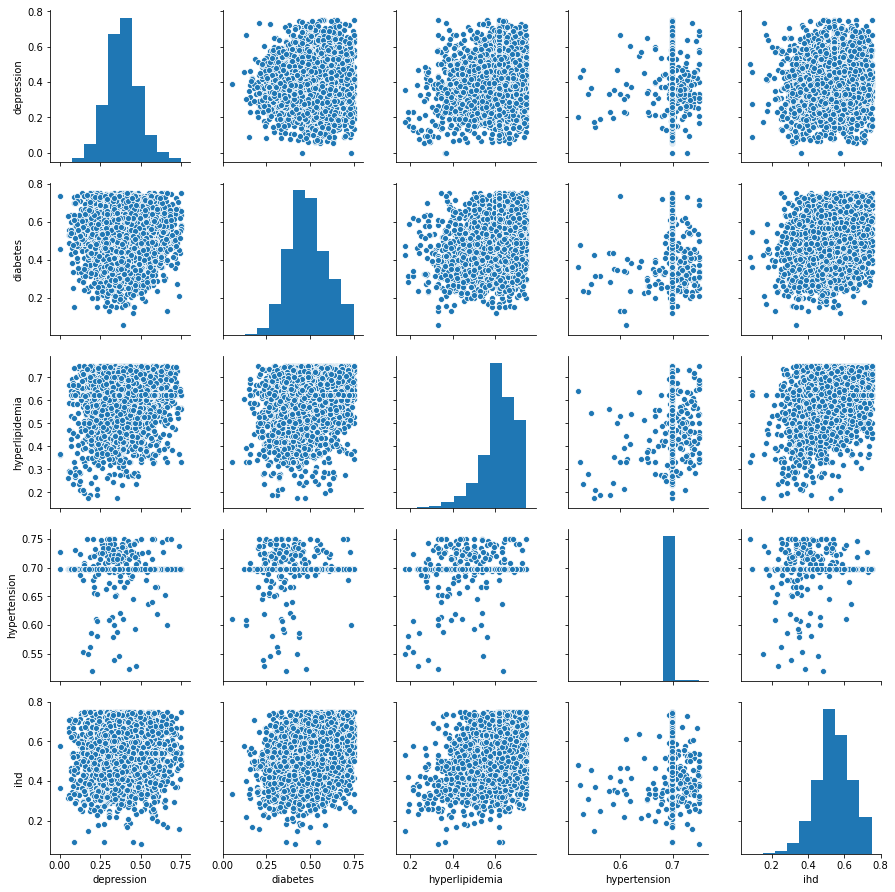

In [37]:
sns.pairplot(medicare_data_train.iloc[:, 40: 45]);

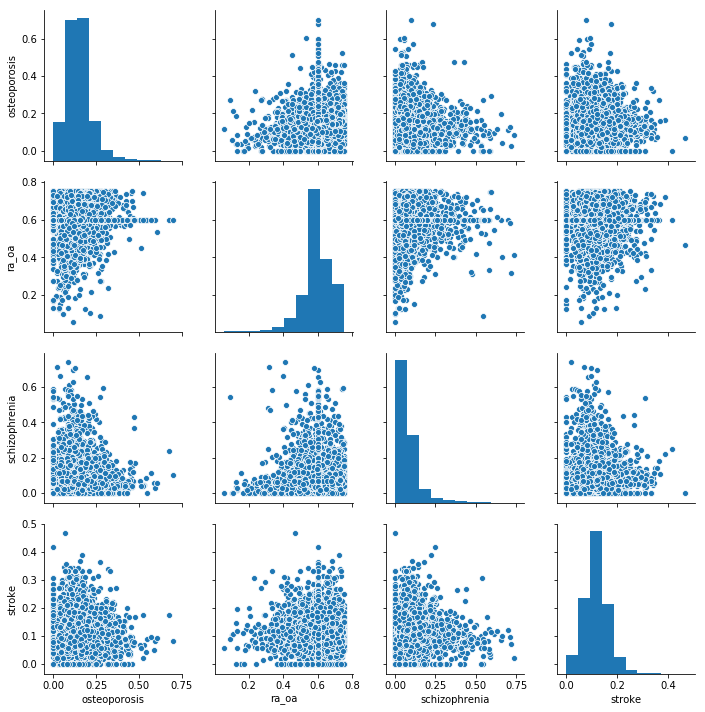

In [38]:
sns.pairplot(medicare_data_train.iloc[:, 45: ]);